<a href="https://colab.research.google.com/github/nissimlab/scRNA-seq-fixed-pancreas/blob/main/figures_plotting/Stress_genes_Methods_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# scRNAseq Data Analysis - Dissociation Stress Genes

** Run 20230112

Methods Comparison datasets for PRJNA978570/FixNCut, GSE180212, GSE141017



In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


#Colab

In [ ]:
!pip install setuptools-scm install scanpy anndata leidenalg watermark numpy==1.22.4 pandas==1.5.3 rpy2==3.4.5 umap-learn==0.5.3 plotnine==0.8.0 panel anndata2ri pybiomart

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 23.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 11.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 98.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
!sudo apt-get update

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Get:4 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:5 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:8 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,776 kB]
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,354 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:14 http://ar

In [ ]:
!sudo apt-get install msttcorefonts -qq

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 17.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libmspack0:amd64.
(Reading database ... 122541 files and directories currently installed.)
Preparing to unpack .../00-libmspack0_0.10.1-2_amd64.deb ...
Unpacking libmspack0:amd64 (0.10.1-2) ...
Selecting previously unselected package cabextract.
Preparing to unpack .../01-cabextract_1.9-3_amd64.deb ...
Unpacking cabextract (1.9-3) ...
Selecting previously unselected package libfontenc1:amd64.
Preparing to unpack .../02-libfontenc1_1%3a1.1.4-0ubuntu1_amd64.deb ...
Unpacking libfontenc1:amd64 (1:1.1.4-0ubun

In [ ]:
!sudo apt install font-manager

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  font-manager-common font-viewer
Suggested packages:
  file-roller nautilus-font-manager nemo-font-manager yelp
The following NEW packages will be installed:
  font-manager font-manager-common font-viewer
0 upgraded, 3 newly installed, 0 to remove and 53 not upgraded.
Need to get 1,740 kB of archives.
After this operation, 9,394 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager-common amd64 0.7.7-0.3 [1,545 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-viewer amd64 0.7.7-0.3 [27.9 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 font-manager amd64 0.7.7-0.3 [168 kB]
Fetched 1,740 kB in 3s (688 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be 

In [ ]:
%%capture
%%!
git clone https://github.com/has2k1/scikit-misc.git
cd scikit-misc
python setup.py install

In [ ]:
!pip install matplotlib==3.5.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 81.3 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1


In [ ]:
!rm ~/.cache/matplotlib -rf

#Load font

In [ ]:
import matplotlib.font_manager as fm

In [ ]:
print(fm.findfont('Arial'))

/usr/share/fonts/truetype/msttcorefonts/Arial.ttf


# Setup

In [ ]:
import scanpy as sc
import numpy as np
import re
import os
import pandas as pd
import seaborn as sb
import matplotlib
import scipy.sparse as sp
from scipy.sparse import issparse
import anndata2ri

import matplotlib as mpl
from scipy import stats as scistats
import matplotlib.pyplot as pl
import scanpy.external as sce
from matplotlib import colors
from pathlib import Path
from ipywidgets import interactive

sc._settings.ScanpyConfig.n_jobs=8

pl.rcParams['pdf.fonttype'] = 'truetype'
sc.set_figure_params(vector_friendly=False,dpi_save=300,transparent=True)
pl.rcParams['lines.linewidth'] = 0.1
sc.set_figure_params(color_map='viridis')
colorsComb = np.vstack([pl.cm.Reds(np.linspace(0, 1, 10)), pl.cm.Greys_r(np.linspace(0.7, 0.8, 0))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)


%matplotlib inline
import panel as pn
pn.extension( comms='colab')


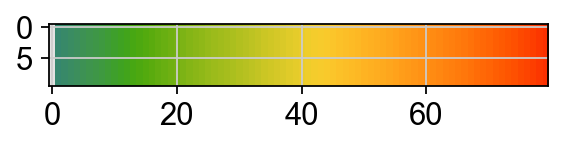

In [ ]:
import colorcet as cc

xs, _ = np.meshgrid(np.linspace(0, 1, 80), np.linspace(0, 1, 10))
colorsComb = np.vstack([pl.cm.Greys_r(np.linspace(0.8,0.1, 1)), cc.cm.rainbow_bgyr_35_85_c72(np.linspace(0.2,1, 100))])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)
pl.imshow(xs, cmap=mymap);  # use tab completion to choose

In [ ]:
# add extra code to the path
!wget https://www.dropbox.com/s/xp4jrhczc0x4aa7/proportions.py
import sys
sys.path.append('/content/')
from proportions import show_values,plot_proportion_barplot_with_ncells

--2023-06-12 20:47:13--  https://www.dropbox.com/s/xp4jrhczc0x4aa7/proportions.py
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/xp4jrhczc0x4aa7/proportions.py [following]
--2023-06-12 20:47:13--  https://www.dropbox.com/s/raw/xp4jrhczc0x4aa7/proportions.py
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc927d26497c64cfa7840dd988a4.dl.dropboxusercontent.com/cd/0/inline/B90c5mB828kzVmJXQpNV36SHQXAR-gVk0qp-tke-9MvnRkxBxbhhL_EwCMODZX9mFAI_NSo6xIsPkwB1sGU27ScrsGdRwtrbRTm8dRg3nhBOJT3L9Pyr85mHGDHmwfkEoBNKya6LM2WIKjqG3wwd2YBRZkBCNVbjqsWSXW5uc2d_mA/file# [following]
--2023-06-12 20:47:14--  https://uc927d26497c64cfa7840dd988a4.dl.dropboxusercontent.com/cd/0/inline/B90c5mB828kzVmJXQpNV36SHQXAR-gVk0qp-tke-9MvnRkxBxbhhL_EwCMODZX9mFAI_NSo

# PART 0. Reproducibility

In [ ]:
%load_ext watermark
%watermark
%watermark --iversions -v -m -p numpy,scipy,sklearn,anndata,scanpy,muon,anndata2ri,rpy2

Last updated: 2023-06-12T20:47:16.550146+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.15.107+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

numpy     : 1.22.4
scipy     : 1.10.1
sklearn   : 1.2.2
anndata   : 0.9.1
scanpy    : 1.9.3
muon      : not installed
anndata2ri: 1.1
rpy2      : 3.4.5

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 5.15.107+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 8
Architecture: 64bit

numpy     : 1.22.4
re        : 2.2.1
panel     : 0.14.4
seaborn   : 0.12.2
anndata2ri: 1.1
colorcet  : 3.0.1
sys       : 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
matplotlib: 3.5.0
scanpy    : 1.9.3
pandas    : 1.5.3
scipy     : 1.10.1



# PART 1. Data merging

# Setup data directory

In [ ]:
folder='/content/drive/MyDrive/CIP_v3_data/Methods_Comparison/'

samplename='Methods_Comparison_v3'
random_state=42

import os
os.chdir(folder)
if not os.path.exists('./figures'):
    os.makedirs('./figures')

In [ ]:
#load processed dataset
adata=sc.read(samplename+'_QCfilteredNormalized_Harmony_Triku_Neighbors_annotated_20230221.h5ad')

In [ ]:
adata

AnnData object with n_obs × n_vars = 33906 × 19596
    obs: 'sample', 'donor', 'date', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'condition', 'batch', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'QC', 'S_score', 'G2M_score', 'phase', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'Acinar', 'ADM', 'Ductal', 'leiden_r0.1', 'annotated', 'annotated2'
    var: 'feature_type', 'id', 'mito', 'n_cells', 'mt', 'rb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'triku_distance', 'triku_distance_uncorrected', 'triku_highly_variable'
    uns: 'QC_colors', 'a

#Stress genes qc metric

In [ ]:
adata.X=adata.layers['cellbender']

In [ ]:
# compute qc metrics
#"Cxcl3" not in index
stress_genes = ["Atf3", "Btg2", "Cebpb", "Cebpd", "Cxcl2", "Cxcl1", "Dnaja1", "Dnajb1", "Dusp1", "Egr1", "Fos", "Fosb", "Hsp90aa1", "Hsp90ab1", "Hspa1a", "Hspa1b", "Hspa8", "Hspb1", "Hspe1", "Hsph1", "Id3", "Ier2", "Jun", "Junb", "Jund", "Nfkbia", "Nr4a1", "Ppp1r15a", "Socs3", "Zfp36"]
adata.var['stress'] = False
adata.var.loc[stress_genes, 'stress'] = True
adata.obs['stress_frac'] = np.sum(
    adata[:, stress_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
print('Found {} stress genes and annotated.'.format(len(stress_genes)))

sc.pp.calculate_qc_metrics(adata, qc_vars=['stress'], inplace=True)



Found 30 stress genes and annotated.


#Stress genes z-score plotting

In [ ]:
#source of gene lists:
#Stress: https://broadinstitute.github.io/2020_scWorkshop/batch-correction-lab.html#read-in-pancreas-expression-matrices
markers={'Stress': ["Atf3", "Btg2", "Cebpb", "Cebpd", "Cxcl3", "Cxcl2", "Cxcl1", "Dnaja1", "Dnajb1", "Dusp1", "Egr1", "Fos", "Fosb", "Hsp90aa1", "Hsp90ab1", "Hspa1a", "Hspa1b", "Hspa8", "Hspb1", "Hspe1", "Hsph1", "Id3", "Ier2", "Jun", "Junb", "Jund", "Nfkbia", "Nr4a1", "Ppp1r15a", "Socs3", "Zfp36"]}

In [ ]:
marker_labels = list(set(markers))

In [ ]:
marker_labels

['Stress']

In [ ]:
#specify double log norm before running score_genes
adata.X=adata.layers['PFlog1pPF_normalization']

In [ ]:
fm.rcParams['font.family']=['Arial']
pl.rcParams['figure.dpi']=200

In [ ]:
for ix, clust in enumerate(marker_labels):
  geneset=markers[clust]
  sc.tl.score_genes(adata, geneset, ctrl_size=10000, use_raw=False,score_name=clust)

In [ ]:
adata

AnnData object with n_obs × n_vars = 33906 × 19596
    obs: 'sample', 'donor', 'date', 'n_counts', 'log_counts', 'n_genes', 'mt_frac', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mito', 'log1p_total_counts_mito', 'pct_counts_mito', 'scDblFinder_class', 'doublet_score', 'predicted_doublet', 'condition', 'batch', 'total_counts_mt', 'pct_counts_mt', 'total_counts_rb', 'pct_counts_rb', 'QC', 'S_score', 'G2M_score', 'phase', 'leiden_r0.8', 'leiden_r0.5', 'leiden_r0.4', 'leiden_r0.3', 'leiden_r0.2', 'Acinar', 'ADM', 'Ductal', 'leiden_r0.1', 'annotated', 'annotated2', 'mt_frac2', 'total_counts_mito2', 'log1p_total_counts_mito2', 'pct_counts_mito2', 'stress_frac', 'total_counts_stress', 'log1p_total_counts_stress', 'pct_counts_stress', 'Stress'
    var: 'feature_type', 'id', 'mito', 'n_cells', 'mt', 'rb', 'n_cells_by_

In [ ]:
marker_labels=['Stress']

In [ ]:
colors_time=[ '#d8527c',  '#8eb3ea', '#4e72d1']

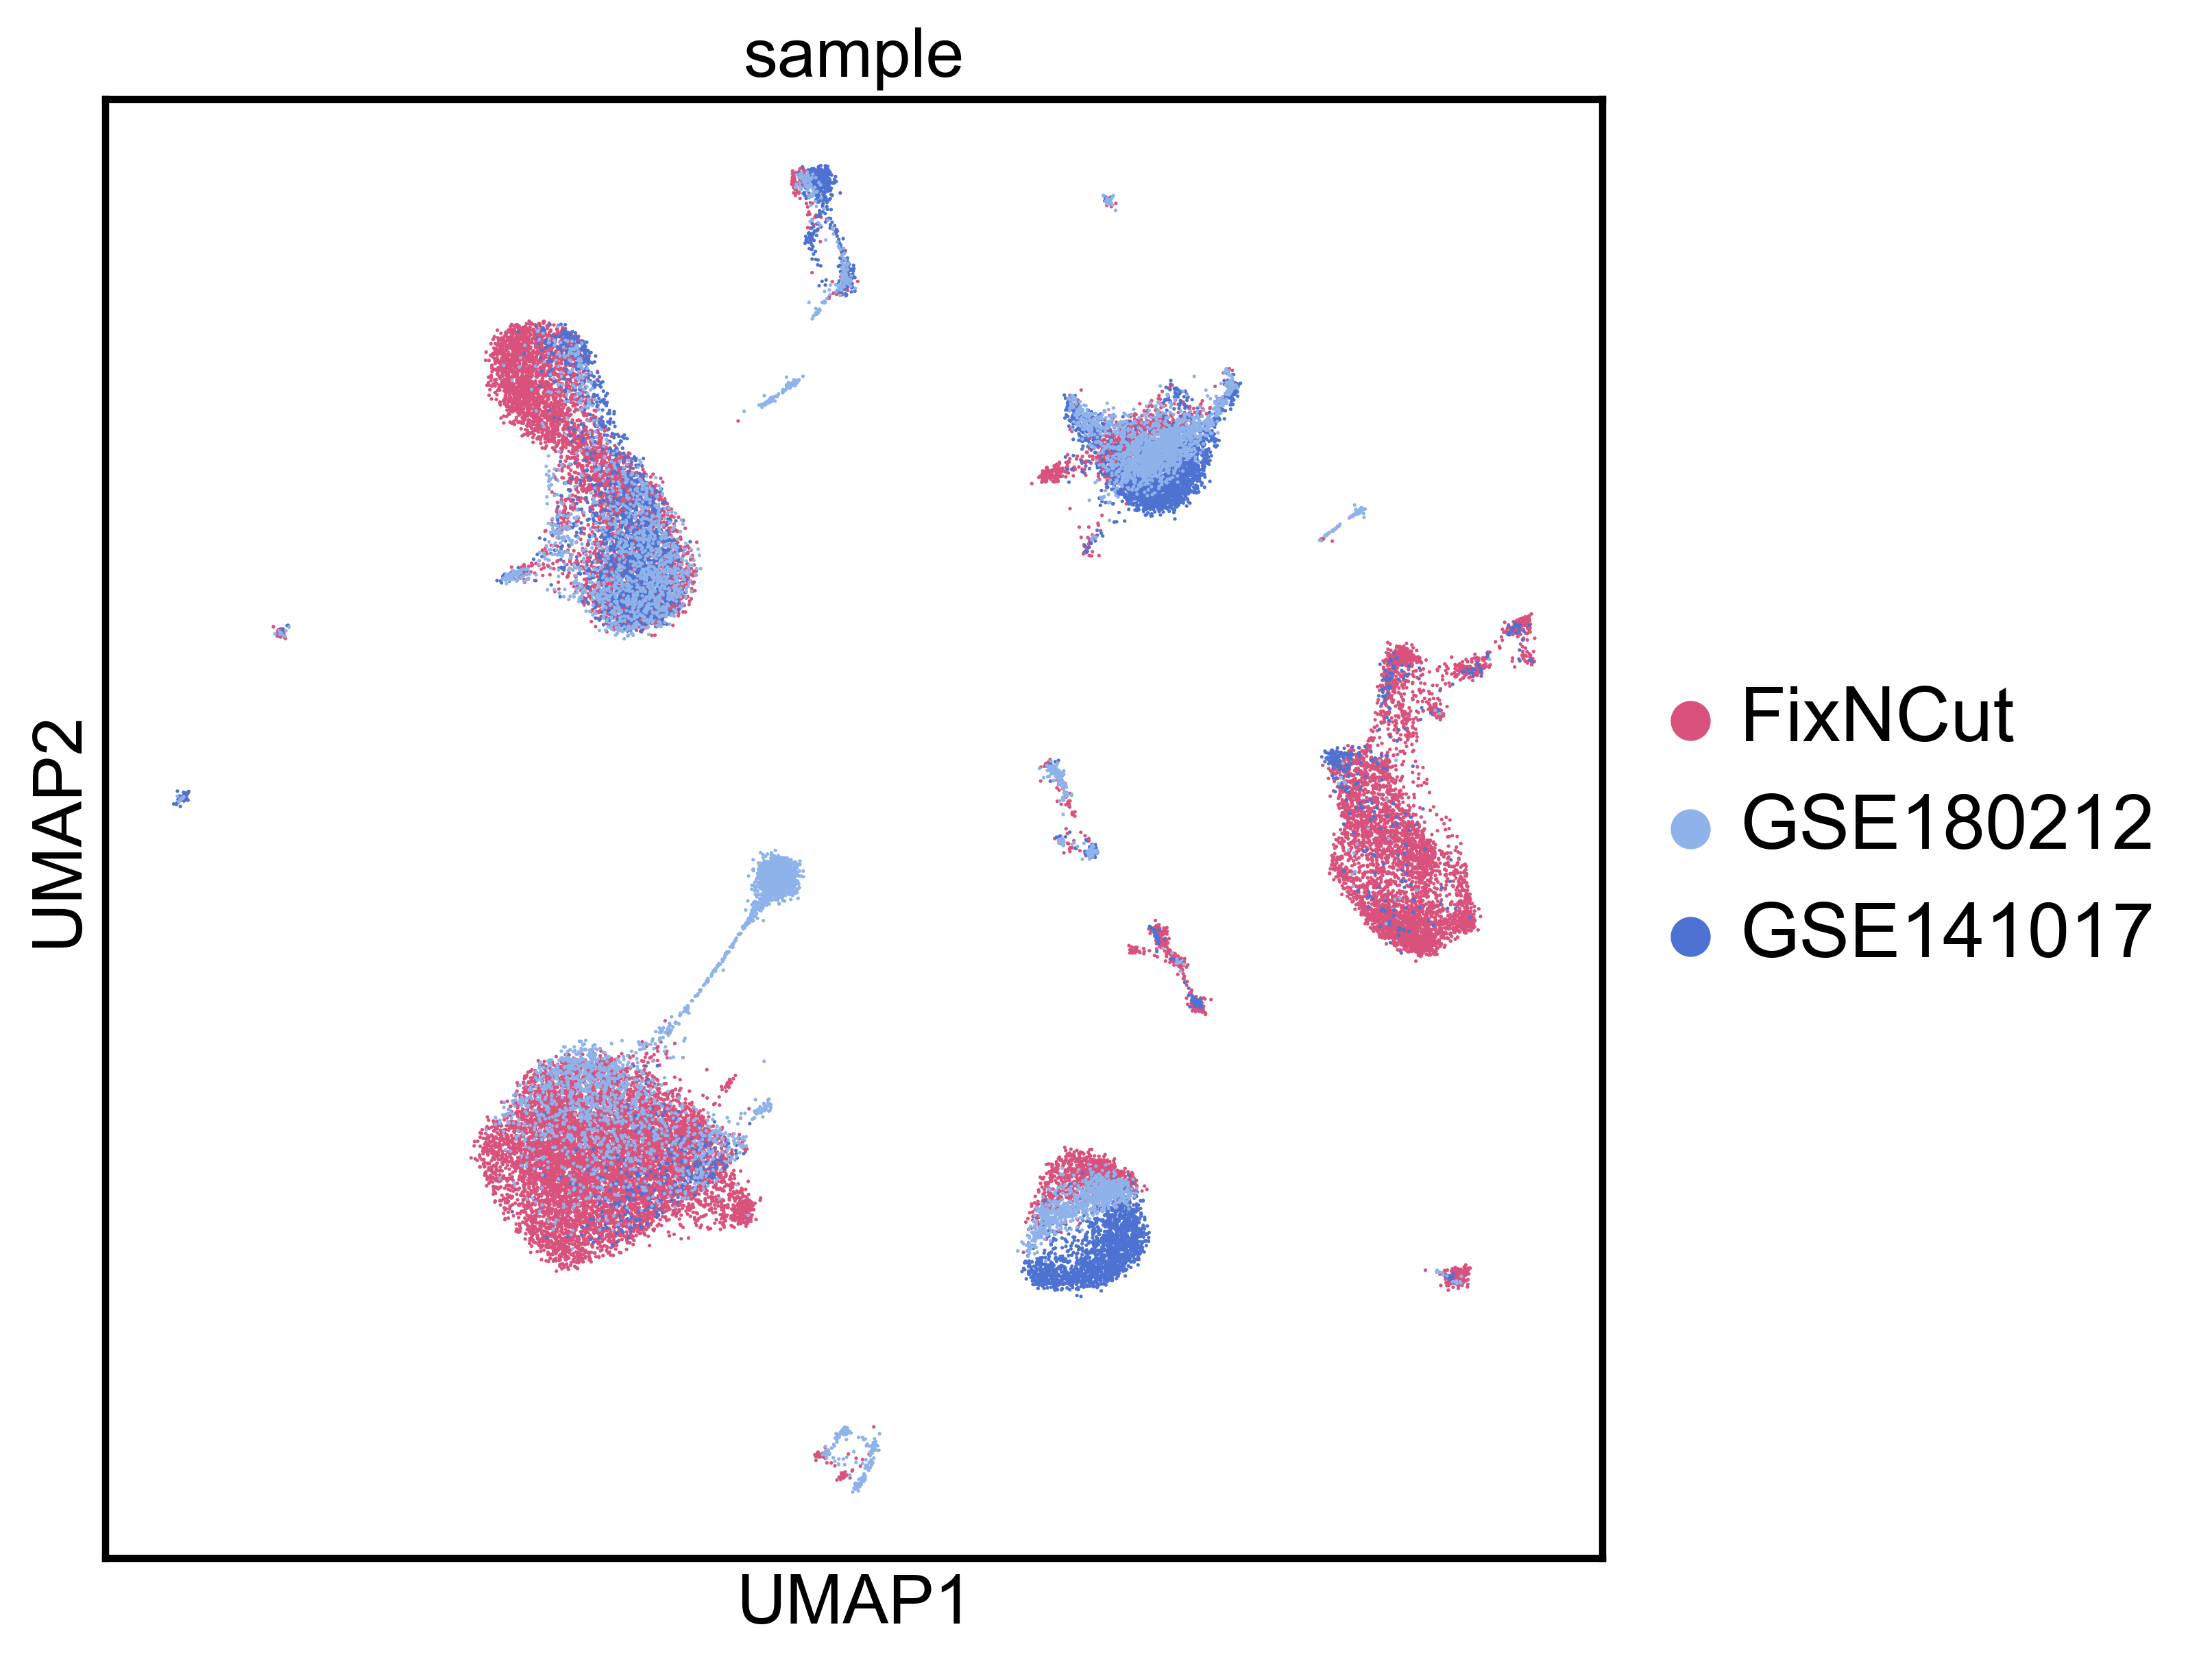

In [ ]:
sb.set_context('talk')
pl.rcParams['figure.figsize']=(7,7)
sc.pl.umap(adata, color=['sample'], palette=colors_time,legend_loc='right margin',legend_fontoutline=3,vmax='p99.9',legend_fontsize=20, legend_fontweight='normal',frameon=True)

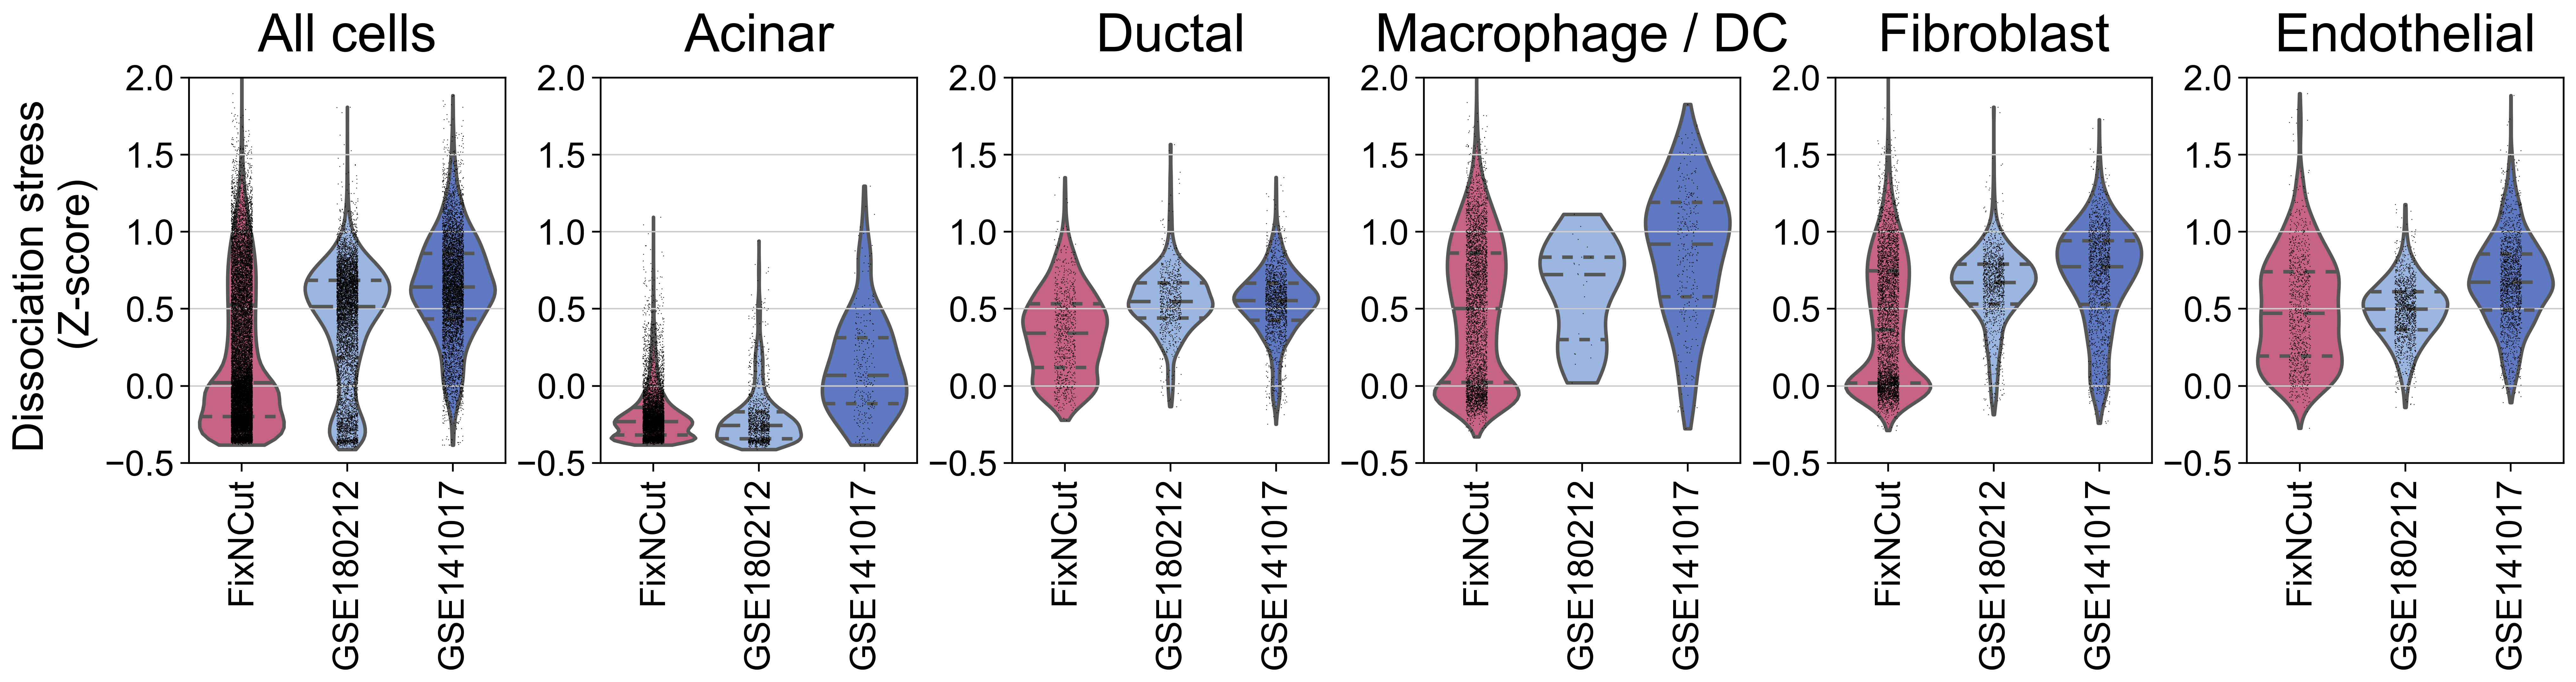

In [ ]:
sb.set_context('paper')
pl.rcParams['figure.figsize']=(5,5)
pl.rcParams['figure.dpi']=200
import matplotlib.pyplot as plt

fig, ((ax5, ax1, ax2, ax3, ax4, ax7)) = plt.subplots(1, 6, figsize=(24,4), gridspec_kw={'wspace':0.3})

ax1.set_title("Acinar",fontsize=30,pad=15.0)
ax2.set_title("Ductal",fontsize=30,pad=15.0)
ax3.set_title("Macrophage / DC",fontsize=30,pad=15.0)
ax4.set_title("Fibroblast",fontsize=30,pad=15.0)

ax5.set_title("All cells", fontsize=30,pad=15.0)
ax7.set_title("Endothelial",fontsize=30,pad=15.0)

ax1_dict = sc.pl.violin(adata[adata.obs["annotated"] == "Acinar"], marker_labels, ax=ax1, jitter=0.1, linewidth=2, alpha=0.25, inner="quartile", size=0.5,groupby='sample',show=False,rotation=90)

ax2_dict = sc.pl.violin(adata[adata.obs["annotated"] == "Ductal"], marker_labels, ax=ax2, jitter=0.1, linewidth=2, alpha=0.25, inner="quartile", size=0.5,groupby='sample',show=False,rotation=90)
ax3_dict = sc.pl.violin(adata[adata.obs["annotated"] == "Macrophage / DC"], marker_labels, ax=ax3, jitter=0.1, linewidth=2, alpha=0.25, inner="quartile", size=0.5,groupby='sample',show=False,rotation=90)
ax4_dict = sc.pl.violin(adata[adata.obs["annotated"] == "Fibroblast"], marker_labels, ax=ax4, jitter=0.1, linewidth=2, alpha=0.25, inner="quartile", size=0.5, groupby='sample',show=False,rotation=90)

ax5_dict = sc.pl.violin(adata, 'Stress', groupby='sample', jitter=0.1, linewidth=2, alpha=0.25, inner="quartile",size=0.5, log=False, cut=0, ax=ax5, show=False,rotation=90)
ax7_dict = sc.pl.violin(adata[adata.obs["annotated"] == "Endothelial"], marker_labels, ax=ax7, jitter=0.1, linewidth=2, alpha=0.25, inner="quartile", size=0.5,groupby='sample',show=False,rotation=90)

plt.yticks(fontsize=30)
yticks = [-0.5, 0, 0.5, 1, 1.5,2]
ax1.set_yticks(yticks)
ax2.set_yticks(yticks)
ax3.set_yticks(yticks)
ax4.set_yticks(yticks)
ax5.set_yticks(yticks)
ax7.set_yticks(yticks)
ax1.set_ylim(-0.5, 2)
ax2.set_ylim(-0.5, 2)
ax3.set_ylim(-0.5, 2)
ax4.set_ylim(-0.5, 2)
ax5.set_ylim(-0.5, 2)
ax7.set_ylim(-0.5, 2)

ax5.set_ylabel("Dissociation stress \n (Z-score)",fontsize=24)
ax1.set_ylabel("")
ax2.set_ylabel("")
ax3.set_ylabel("")
ax4.set_ylabel("")
ax7.set_ylabel("")

ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=20)
ax5.tick_params(axis='both', which='major', labelsize=20)
ax7.tick_params(axis='both', which='major', labelsize=20)

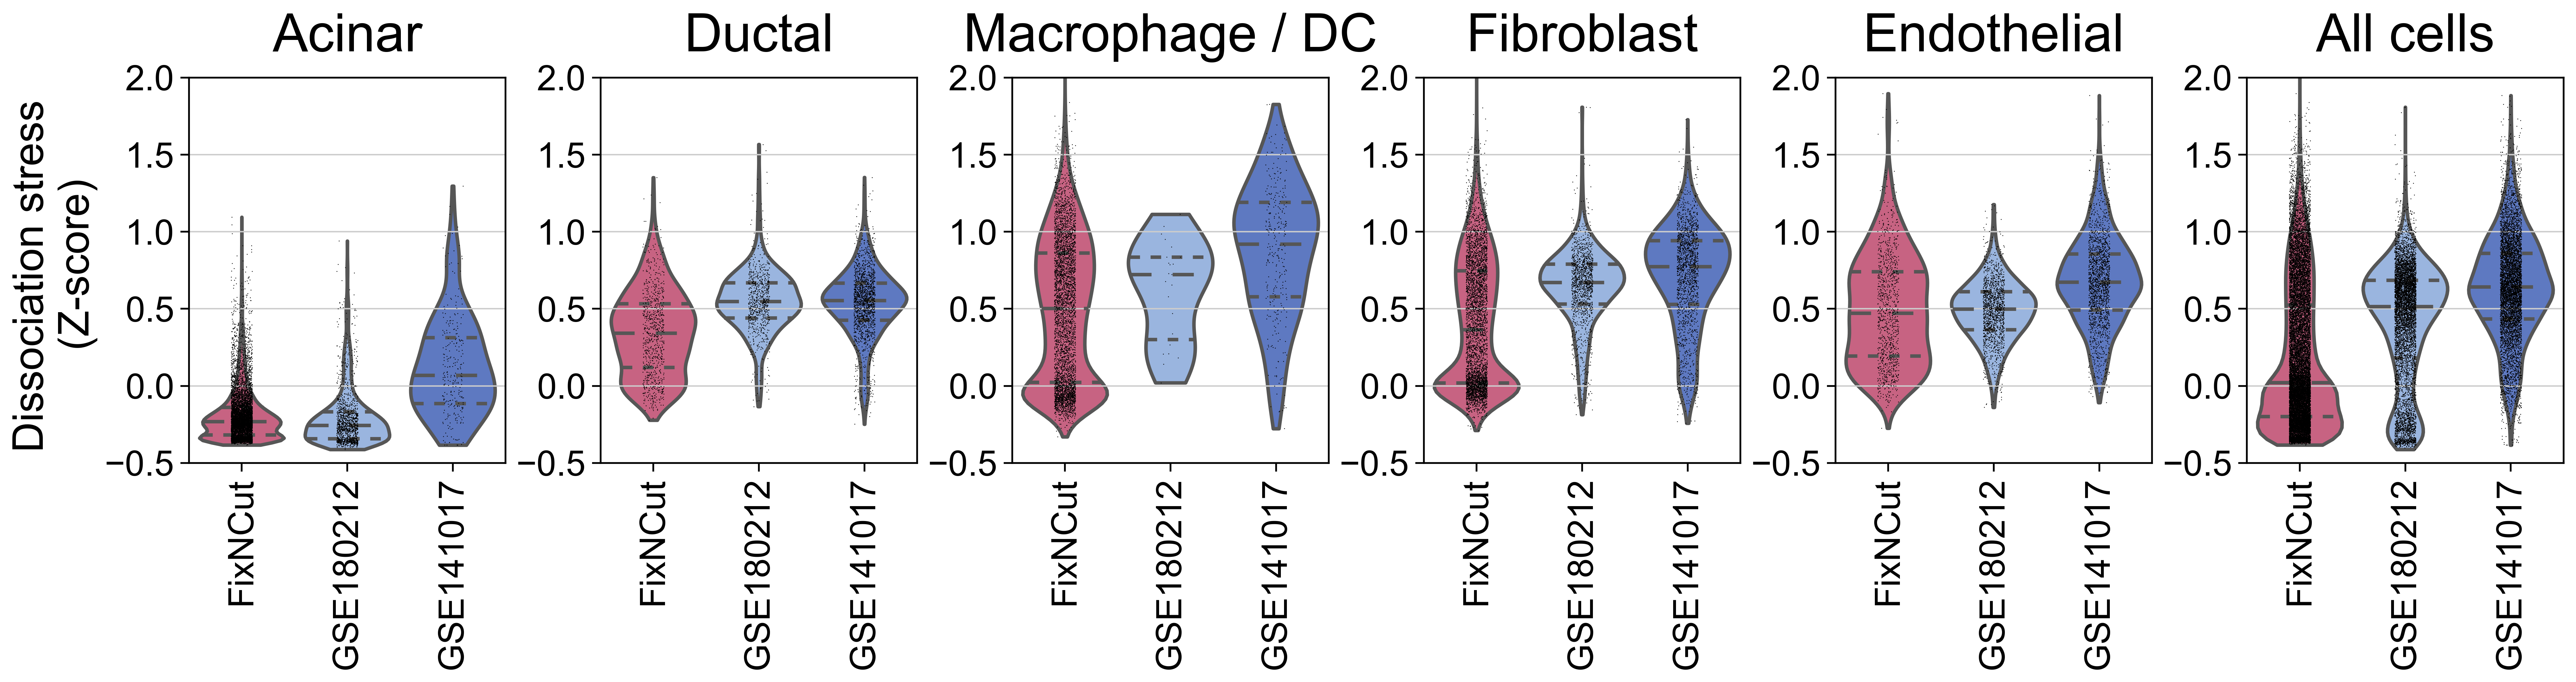

In [ ]:
sb.set_context('paper')
pl.rcParams['figure.figsize']=(5,5)
pl.rcParams['figure.dpi']=200
import matplotlib.pyplot as plt

fig, ((ax1, ax2, ax3, ax4, ax7,ax5)) = plt.subplots(1, 6, figsize=(24,4), gridspec_kw={'wspace':0.3})

ax1.set_title("Acinar",fontsize=30,pad=15.0)
ax2.set_title("Ductal",fontsize=30,pad=15.0)
ax3.set_title("Macrophage / DC",fontsize=30,pad=15.0)
ax4.set_title("Fibroblast",fontsize=30,pad=15.0)

ax5.set_title("All cells", fontsize=30,pad=15.0)
ax7.set_title("Endothelial",fontsize=30,pad=15.0)

ax1_dict = sc.pl.violin(adata[adata.obs["annotated"] == "Acinar"], marker_labels, ax=ax1, jitter=0.1, linewidth=2, alpha=0.25, inner="quartile", size=0.5,groupby='sample',show=False,rotation=90)

ax2_dict = sc.pl.violin(adata[adata.obs["annotated"] == "Ductal"], marker_labels, ax=ax2, jitter=0.1, linewidth=2, alpha=0.25, inner="quartile", size=0.5,groupby='sample',show=False,rotation=90)
ax3_dict = sc.pl.violin(adata[adata.obs["annotated"] == "Macrophage / DC"], marker_labels, ax=ax3, jitter=0.1, linewidth=2, alpha=0.25, inner="quartile", size=0.5,groupby='sample',show=False,rotation=90)
ax4_dict = sc.pl.violin(adata[adata.obs["annotated"] == "Fibroblast"], marker_labels, ax=ax4, jitter=0.1, linewidth=2, alpha=0.25, inner="quartile", size=0.5, groupby='sample',show=False,rotation=90)

ax5_dict = sc.pl.violin(adata, 'Stress', groupby='sample', jitter=0.1, linewidth=2, alpha=0.25, inner="quartile",size=0.5, log=False, cut=0, ax=ax5, show=False,rotation=90)
ax7_dict = sc.pl.violin(adata[adata.obs["annotated"] == "Endothelial"], marker_labels, ax=ax7, jitter=0.1, linewidth=2, alpha=0.25, inner="quartile", size=0.5,groupby='sample',show=False,rotation=90)

plt.yticks(fontsize=30)
yticks = [-0.5, 0, 0.5, 1, 1.5,2]
ax1.set_yticks(yticks)
ax2.set_yticks(yticks)
ax3.set_yticks(yticks)
ax4.set_yticks(yticks)
ax5.set_yticks(yticks)
ax7.set_yticks(yticks)
ax1.set_ylim(-0.5, 2)
ax2.set_ylim(-0.5, 2)
ax3.set_ylim(-0.5, 2)
ax4.set_ylim(-0.5, 2)
ax5.set_ylim(-0.5, 2)
ax7.set_ylim(-0.5, 2)

ax1.set_ylabel("Dissociation stress \n (Z-score)",fontsize=24)
ax5.set_ylabel("")
ax2.set_ylabel("")
ax3.set_ylabel("")
ax4.set_ylabel("")
ax7.set_ylabel("")

ax1.tick_params(axis='both', which='major', labelsize=20)
ax2.tick_params(axis='both', which='major', labelsize=20)
ax3.tick_params(axis='both', which='major', labelsize=20)
ax4.tick_params(axis='both', which='major', labelsize=20)
ax5.tick_params(axis='both', which='major', labelsize=20)
ax7.tick_params(axis='both', which='major', labelsize=20)

#Calculating stress and mito genes counts percentage of total counts for bar graphs

In [ ]:
from statistics import mean

In [ ]:
#specify cellbender layer for counts
adata.X=adata.layers['cellbender']

In [ ]:
list_of_donors = ["control_1","control_2","control_3","control_4","control_5","P_1","S_1","S_2","S_3","S_4"]
for d in list_of_donors:
    print('stress fraction using total counts for '+d)
    print(sum(adata[adata.obs["donor"]==d].obs["total_counts_stress"])/sum(adata[adata.obs["donor"]==d].obs["total_counts"])*100)

stress fraction using total counts for control_1
0.9731144125041447
stress fraction using total counts for control_2
0.8620270557920717
stress fraction using total counts for control_3
0.5534176083888329
stress fraction using total counts for control_4
1.108334007778597
stress fraction using total counts for control_5
0.8961594663389281
stress fraction using total counts for P_1
2.0252248168760687
stress fraction using total counts for S_1
2.3772888158967955
stress fraction using total counts for S_2
2.5631664318407545
stress fraction using total counts for S_3
2.5438707041690165
stress fraction using total counts for S_4
2.7153436820259906


In [ ]:
list_of_donors = ["control_1","control_2","control_3","control_4","control_5","P_1","S_1","S_2","S_3","S_4"]
for d in list_of_donors:
    print('mito fraction using total counts for '+d)
    print(sum(adata[adata.obs["donor"]==d].obs["total_counts_mito"])/sum(adata[adata.obs["donor"]==d].obs["total_counts"])*100)

mito fraction using total counts for control_1
1.7525591866887114
mito fraction using total counts for control_2
1.485129050329212
mito fraction using total counts for control_3
1.4577692599125422
mito fraction using total counts for control_4
1.083183028940396
mito fraction using total counts for control_5
1.6783615581154196
mito fraction using total counts for P_1
3.634397934127345
mito fraction using total counts for S_1
2.350192533094619
mito fraction using total counts for S_2
2.482429036255084
mito fraction using total counts for S_3
2.3728126283932625
mito fraction using total counts for S_4
2.644654545170735
